In [173]:
import numpy as np

1. Numpy

Create random array, reshape that array

In [198]:
random = np.random.randint(20, size=(1,15)).reshape(3,5)
random

array([[ 7,  5, 16, 10,  0],
       [18,  9,  7, 14, 18],
       [17, 13,  0,  5, 15]])

Replace the max of each array with 0 and then extract a diagonal and say it as a .npy file

In [199]:
row_maxes = random.max(axis=1).reshape(3, 1)
random = np.where(random == row_maxes, 0, random)
print(row_maxes)
print('\n')

np.save("randomDiag",np.diag(random))
random

[[16]
 [18]
 [17]]




array([[ 7,  5,  0, 10,  0],
       [ 0,  9,  7, 14,  0],
       [ 0, 13,  0,  5, 15]])

2. Pandas

Read and describe the data

In [161]:
from numpy.core.numeric import NaN
import pandas as pd
#read csv file
df = pd.read_csv("/content/data.csv")
#show basic stats descript
print(df.head())
df.describe()

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


Replace null values with the mean

In [162]:
df=df.fillna(df.mean())
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


Aggregate the data (min, max, count, mean) with selected columns

In [163]:
df[['Duration','Pulse','Maxpulse', 'Calories']].agg(['min','mean','max','count'])

,Duration,Pulse,Maxpulse,Calories
min,15.000000,80.000000,100.000000,50.300000
mean,63.846154,107.461538,134.047337,375.790244
max,300.000000,159.000000,184.000000,1860.400000
count,169.000000,169.000000,169.000000,169.000000


Filter the data to select rows with Calorie values between 500 and 1000

In [164]:
df_sub = df[(df['Calories'] < 1000) & (df['Calories'] > 500)]
df_sub.describe()

,Duration,Pulse,Maxpulse,Calories
count,14.000000,14.000000,14.000000,14.000000
mean,128.571429,99.500000,126.857143,693.421429
std,39.390968,9.378781,10.212038,154.737058
min,80.000000,90.000000,100.000000,500.300000
25%,90.000000,90.750000,124.250000,572.425000
50%,135.000000,99.000000,127.000000,671.550000
75%,157.500000,104.000000,130.000000,812.100000
max,180.000000,123.000000,146.000000,953.200000


Filter the data to select rows with Calorie values > 500 and Pulse < 100

In [165]:
df_sub_2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
df_sub_2.describe()

,Duration,Pulse,Maxpulse,Calories
count,8.000000,8.000000,8.000000,8.000000
mean,127.500000,93.125000,121.875000,729.612500
std,41.661904,3.642507,9.583282,225.860763
min,90.000000,90.000000,100.000000,500.300000
25%,90.000000,90.000000,120.000000,547.500000
50%,120.000000,91.500000,124.500000,702.200000
75%,157.500000,97.000000,127.500000,838.600000
max,180.000000,98.000000,130.000000,1115.000000


Create new dataframe that has all columns except Maxpulse

In [166]:
df_modified = df[['Duration', 'Pulse', 'Calories']].copy()
df_modified.describe()

,Duration,Pulse,Calories
count,169.000000,169.000000,169.000000
mean,63.846154,107.461538,375.790244
std,42.299949,14.510259,262.385991
min,15.000000,80.000000,50.300000
25%,45.000000,100.000000,253.300000
50%,60.000000,105.000000,321.000000
75%,60.000000,111.000000,384.000000
max,300.000000,159.000000,1860.400000


Remove Maxpulse from the original dataframe

In [167]:
df = df.drop(['Maxpulse'], axis=1)
df.describe()

,Duration,Pulse,Calories
count,169.000000,169.000000,169.000000
mean,63.846154,107.461538,375.790244
std,42.299949,14.510259,262.385991
min,15.000000,80.000000,50.300000
25%,45.000000,100.000000,253.300000
50%,60.000000,105.000000,321.000000
75%,60.000000,111.000000,384.000000
max,300.000000,159.000000,1860.400000


In [169]:
df['Calories'].dtype

dtype('float64')

Convert the datatype of Calories column to int datatype

In [202]:
print('Old datatype: ')
print(df['Calories'].dtype)
df['Calories'] = df['Calories'].astype(int)
print('\nNew datatype: ')
print(df['Calories'].dtype)
df.describe()

Old datatype: 
int64

New datatype: 
int64


,Duration,Pulse,Calories
count,169.000000,169.000000,169.000000
mean,63.846154,107.461538,375.544379
std,42.299949,14.510259,262.411685
min,15.000000,80.000000,50.000000
25%,45.000000,100.000000,253.000000
50%,60.000000,105.000000,321.000000
75%,60.000000,111.000000,384.000000
max,300.000000,159.000000,1860.000000


Use pandas to create a scatter plot for the two columns Duration and Calories

Text(0, 0.5, 'Calories')

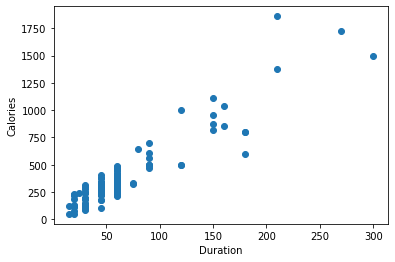

In [172]:
import matplotlib.pyplot as plt
plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')

3. MatPlotLib

Read the image into a MatPlotLib plot

In [ ]:
import matplotlib.image as mpimg
image = mpimg.imread('umkc.jpg')

Show the image

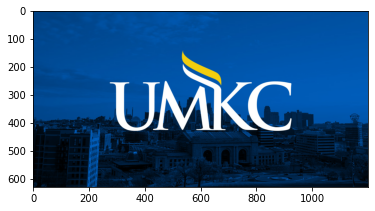

In [ ]:
plt.imshow(image)

Get the shape of the image

In [ ]:
image.shape

(630, 1200, 3)

Crop the border by slicing the array. Keep the UMKC text

<function matplotlib.pyplot.show>

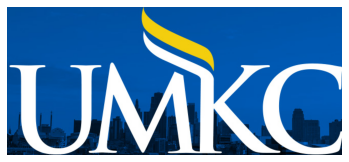

In [ ]:
cropped = image[140:430, 270:925, :]
plt.imshow(cropped)
plt.axis('off')
plt.savefig("cropped_image.jpg", bbox_inches='tight', pad_inches=0)
plt.show

Change the background of the image using a where method. This method places a black pixel where the pixel value is less than 200. Save the image as a jpg.

<function matplotlib.pyplot.show>

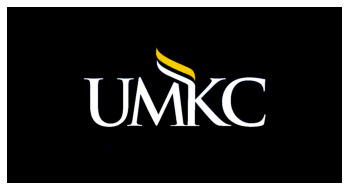

In [ ]:
image.shape
no_background = np.where(image > 200, image, 0)
plt.imshow(no_background)
plt.axis('off')
plt.savefig("np_where_image.jpg", bbox_inches='tight', pad_inches=0)
plt.show